# Seaborn 라이브러리 활용
    - Matplotlib 기능과 스타일 확장한 파이썬 시각화 도구
    - https://seaborn.pydata.org/index.html
    - 설치 : pip install seaborn
    - seaborn 라이브러리에서 제공하는 titanic 데이터셋을 활용해서 seaborn을 활용한 다양한 시각화 방법을 알아본다.

In [2]:
# 라이브러리 불러오기
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# 타이타닉 데이터셋 가지고 오기
titanic = sns.load_dataset('titanic')
# 찍어보기
#print(titanic)
print(titanic.head)
print(titanic.info())


<bound method NDFrame.head of      survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_mal

# 회기선이 있는 산점도  pdf 2페이지
    - regplot(): 서로 다른 2개의 연속 변수 사이의 산점도를 표시
    - 선형회기선 표시 fit_reg = { True | False }


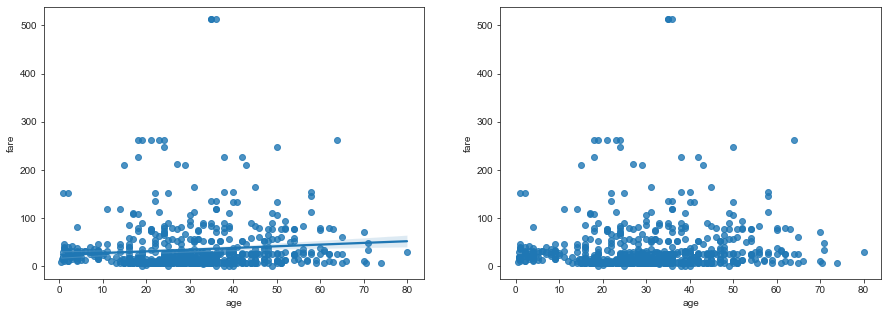

In [4]:
import seaborn as sns

# 스타일 테마 설정 (5가지 : 'darkgrid', 'whitegrid', 'dark', 'white', 'ticks')
sns.set_style('ticks')
# 그래프 객체 생성(figure에 2개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
# 선형회귀선 표시(fit_reg=True))
sns.regplot(x='age',  # x축 변수
            y='fare',  # y축 변수
            data=titanic,  # axe 객체 - 데이터프레임
            ax=ax1)
# 선형회귀선 미표시(fit_reg=False))
sns.regplot(x='age',  # x축 변수
            y='fare',  # y축 변수
            data=titanic,  # axe 객체 - 데이터프레임
            ax=ax2,
            fit_reg=False)  # 회기선 미표시
plt.show()


# 히스토그램/커널 밀도 그래프
distplot() : 단변수(하나의 변수) 데이터의 분포 표현
- 히스토그램 : 누적값 표현, 표시하지 않으려면 hist =False
- 커널 밀도 : 그래프와 x 축 사이의 면적이 1이 되도록 표현, 표시하지 않으려면 kde = False

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to us

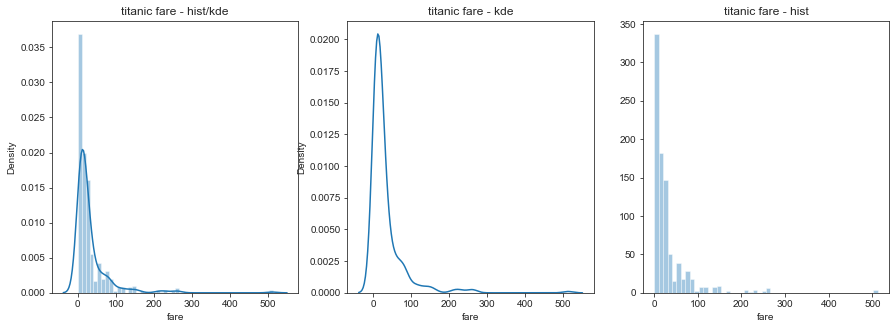

In [5]:
# 그래프 객체 생성( 3개의 서브 플롯 )
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)
# 기본 형식
sns.distplot(titanic['fare'], ax=ax1)
# hist = False
sns.distplot(titanic['fare'], hist=False, ax=ax2)
#sns.kdeplot(data=titanic, x='fare', ax = ax2)
# kde = False
sns.distplot(titanic['fare'], kde=False, ax=ax3)
#sns.histplot(data=titanic, x='fare', ax = ax3)
# 차트 제목 표시
ax1.set_title('titanic fare - hist/kde')
ax2.set_title('titanic fare - kde')
ax3.set_title('titanic fare - hist')
plt.show()


# 히트맵(heatmap)
heatmap() : 2개의 범주형 변수를 각각 x, y축에 놓고 데이터를
매트릭스 형태로 분류해서 표현
- 데이터값 크기를 기준으로 집계 : aggfunc='size'
- 컬러바(색 온도) 표시 여부 : cbar= { True | False}

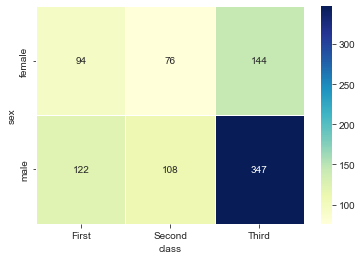

In [6]:
# 피벗테이블로 범주형 변수를 각각 형, 열로 재구분해 정리
table = titanic.pivot_table(index=['sex'], columns=['class'], aggfunc='size')
# 히트맵 그리기
sns.heatmap(table,
            annot=True,
            fmt='d',
            cmap='YlGnBu',
            linewidth=.5,
            cbar=True)
plt.show()


# 범주형 데이터의 산점도
stripplot(), swarmplot() : 범주형 변수에 들어있는 각 범주별
데이터의 분표 표시
- swarmplot()은 데이터 분산까지 고려, 점이 중복되지 않도록
표시
- 범주별 색상을 달리 할 때 hue = "변수명"

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


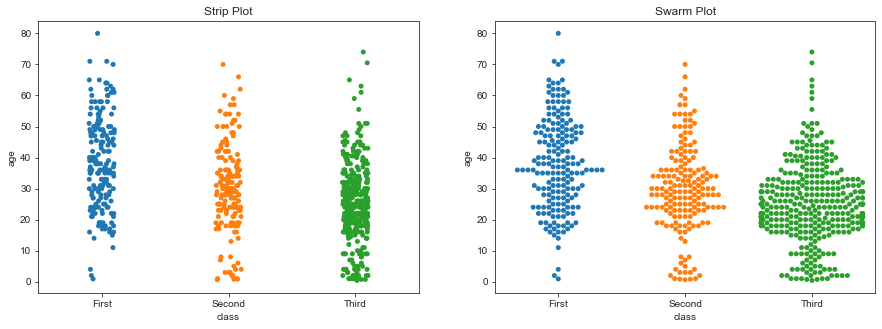

In [7]:
# 그래프 객체 생성( 1행 2열)
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
# 이산형 변수 분포 - 데이터 분산 고려하지 않음
sns.stripplot(x='class',
              y='age',
              data=titanic,
              ax=ax1)
# 이산형 변수 분포 - 데이터 분산 고려 (중복 X)
sns.swarmplot(x='class',
              y='age',
              data=titanic,
              ax=ax2)
# 차트 제목 표시
ax1.set_title('Strip Plot')
ax2.set_title('Swarm Plot')
plt.show()


# 막대 그래프
barplot() : 막대형 그래프 표현
- 누적여부 dodge= { False | True }
- 범주별 색상을 달리 할 때 hue = "변수명"

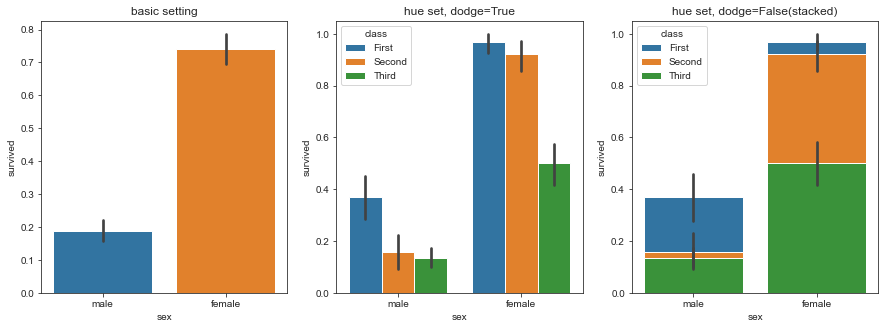

In [8]:
# 그래프 객체 생성( 3개의 서브 플롯 )
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)
# x, y 축에 변수 할당
sns.barplot(x='sex', y='survived', data=titanic, ax=ax1)
# x, y 축에 변수 할당, hue옵션 추가
sns.barplot(x='sex', y='survived', hue='class', data=titanic, ax=ax2)
# x, y 축에 변수 할당, hue옵션 추가
sns.barplot(x='sex', y='survived', hue='class',
            dodge=False, data=titanic, ax=ax3)
# 차트 제목 표시
ax1.set_title('basic setting')
ax2.set_title('hue set, dodge=True')
ax3.set_title('hue set, dodge=False(stacked)')
plt.show()


In [9]:
# 빈도 그래프
## countplot() : 각 범주에 속하는 데이터의 개수를 막대 그래프로 표현
## - 막대별로 색상을 달리할 때 : palette = { 'Set1' | 'Set2' | 'Set3'}
## - 범주별 색상을 달리 할 때 hue = "변수명"

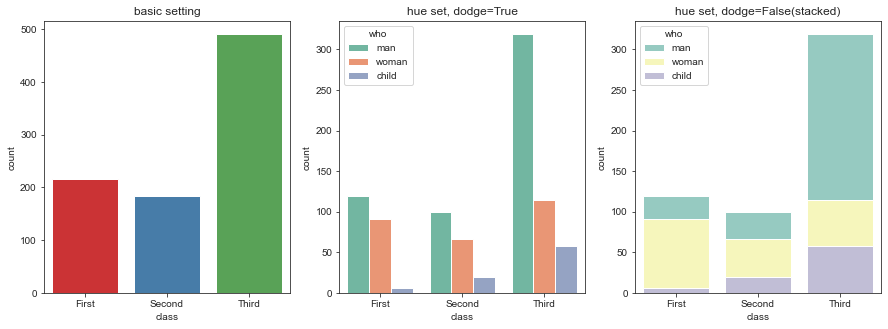

In [10]:
# 그래프 객체 생성( 3개의 서브 플롯 )
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)
# 기본값
sns.countplot(x='class', palette='Set1', data=titanic, ax=ax1)
# hue옵션에 who 추가
sns.countplot(x='class', hue='who', palette='Set2', data=titanic, ax=ax2
              )
# dodge=False 누적그래프 형태로 그려보기
sns.countplot(x='class', hue='who', palette='Set3', dodge=False, data=titanic, ax=ax3)
# 차트 제목 표시
ax1.set_title('basic setting')
ax2.set_title('hue set, dodge=True')
ax3.set_title('hue set, dodge=False(stacked)')
plt.show()


# 박스 플롯/바이올린 그래프
boxplot() : 범주형 데이터 분포와 주요 통계 지표 표시, 데이터
분산 정도를 알 수 있음
violinplot(): 데이터 분산정도 표현 가능(커널 밀도 함수)
- 범주별 색상을 달리 할 때 hue = "변수명"


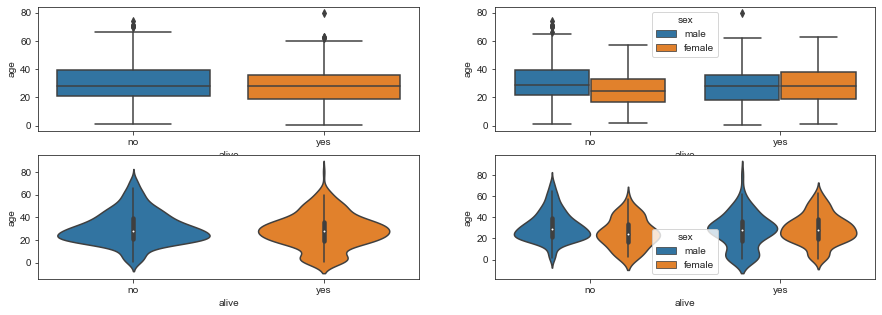

In [11]:
 # 그래프 객체 생성( 3개의 서브 플롯 )
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)
# 박스 그래프 - 기본
sns.boxplot(x='alive', y='age', data=titanic, ax=ax1)
# 박스 그래프 - hue 추가
sns.boxplot(x='alive', y='age', hue='sex', data=titanic, ax=ax2)
# 바이올린 그래프- 기본값
sns.violinplot(x='alive', y='age', data=titanic, ax=ax3)
# 바이올린 그래프- hue 추가
sns.violinplot(x='alive', y='age', hue='sex', data=titanic, ax=ax4)
plt.show()

# 조인트 그래프
jointplot() : 산점도를 기본 표시하고 x, y축에 각 변수에 대한
히스토그램을 동시에 표현
산점도 표시 방법 kind= { 'scatter' | 'reg' | 'resid' | 'kde' |
'hex'} 옵션사항, 디폴트는 'scatter'


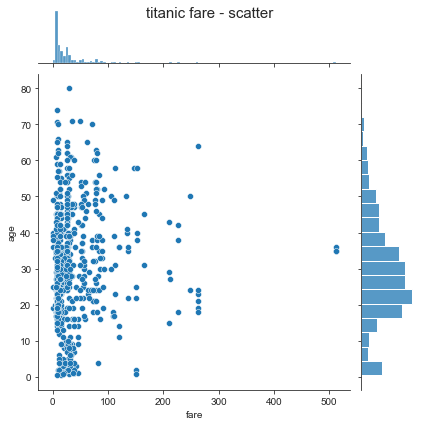

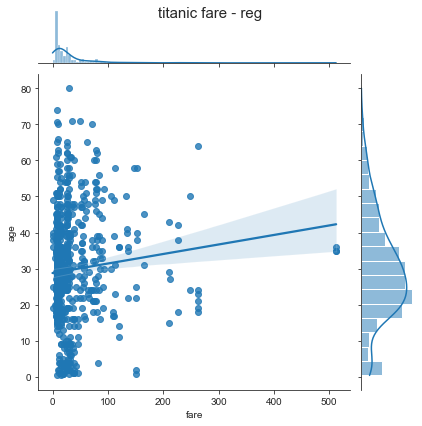

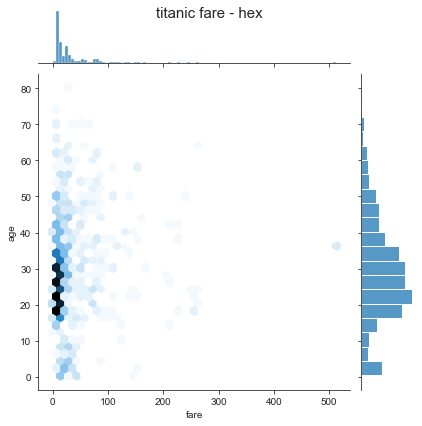

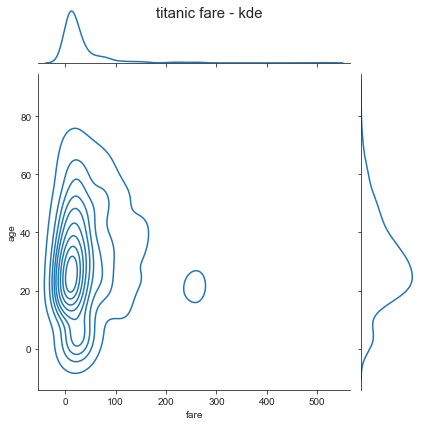

In [12]:
# 조인트 그래프 - 산점도(기본값)
j1 = sns.jointplot(x='fare', y='age', data=titanic)
# 조인트 그래프 - 회기선
j2 = sns.jointplot(x='fare', y='age', kind='reg', data=titanic)
# 조인트 그래프 - 육각 벌집모양
j3 = sns.jointplot(x='fare', y='age', kind='hex', data=titanic)
# 조인트 그래프 - 커널 밀집 그래프
j4 = sns.jointplot(x='fare', y='age', kind='kde', data=titanic)
j1.fig.suptitle('titanic fare - scatter', size=15)
j2.fig.suptitle('titanic fare - reg', size=15)
j3.fig.suptitle('titanic fare - hex', size=15)
j4.fig.suptitle('titanic fare - kde', size=15)
plt.show()



# 조건에 따라 화면을 그리드로 분할해보기
FacetGrid() : 행, 열 방향으로 서로 다른 조건을 적용한 여려 개
의 서브 플롯 표현
map() : 각 서브 플롯에 표현할 그래프 종류 전달

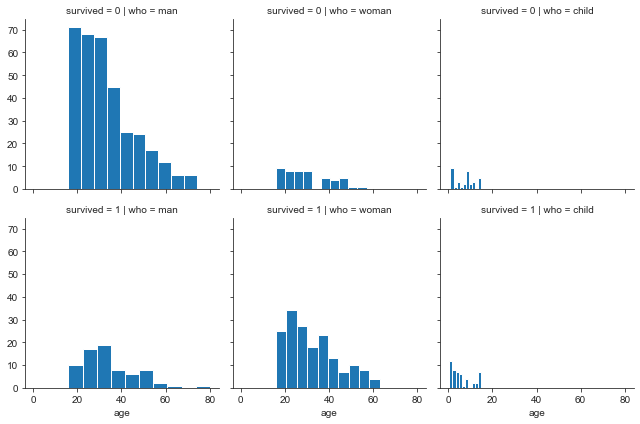

In [13]:
 # 조건에 따라 그리드 나누기
g = sns.FacetGrid(data=titanic, col='who', row='survived')
# 그래프 적용하기
g = g.map(plt.hist, 'age')

# 이변수(서로 다른 변수) 데이터 분포
pairplot() : 데이터프레임의 열(변수)을 두 개씩 짝을 지을 수
있는 모든 조합에 대해 표현
- 짝지을 변수는 리스트형태로 데이터프레임으로 부터 선택해
넘김
- 같은 변수 짝(대각선)은 히스토그램, 서로 다른 변수 짝은 산
점도로 표현됨

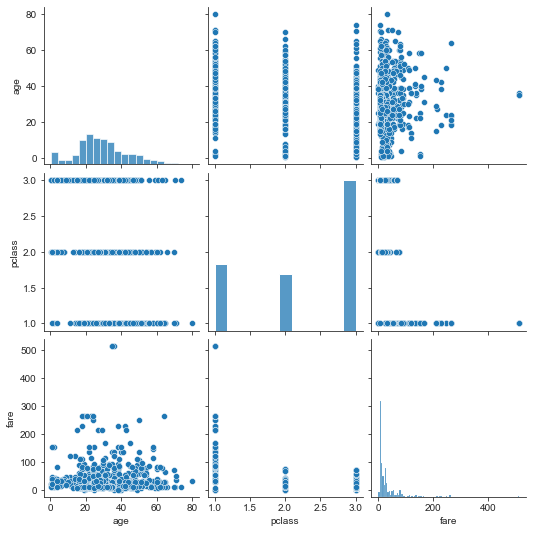

In [14]:
 # titanic 데이터셋 중에서 분석할 데이터 선택하기
titanic_pair = titanic[['age', 'pclass', 'fare']]
# 조건에 따라 그리드 나누어 표시하기
g = sns.pairplot(titanic_pair)

# 지도 api

In [15]:
import pandas as pd
import json

# Folium 라이브러리
# - 지도 위에 데이터 시각화
# - 웹기반 지도 출력
# - 라이브러리 설치 : pip install folium

# 라이브러리 불러오기
import folium